In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv')

In [3]:
df.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


In [4]:
df.tail()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0
269,270,21/03/20,West Bengal,3,0,0,0


In [5]:
df.shape

(270, 7)

In [6]:
df.info

<bound method DataFrame.info of      Sno      Date  ... Cured  Deaths
0      1  30/01/20  ...     0       0
1      2  31/01/20  ...     0       0
2      3  01/02/20  ...     0       0
3      4  02/02/20  ...     0       0
4      5  03/02/20  ...     0       0
..   ...       ...  ...   ...     ...
265  266  21/03/20  ...     0       0
266  267  21/03/20  ...     0       0
267  268  21/03/20  ...     9       0
268  269  21/03/20  ...     0       0
269  270  21/03/20  ...     0       0

[270 rows x 7 columns]>

In [7]:
df.isna().sum()

Sno                         0
Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64

In [8]:
g1 = df.drop(columns = ['Sno','State/UnionTerritory']).groupby(by = ['Date'],sort = False,as_index = False)
g1 = g1.sum()

In [9]:
g1['Total_cases'] = g1.sum(axis = 1)

In [10]:
g1.loc[g1['Date']=='04/03/20']

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
34,04/03/20,12,16,3,0,31


Text(0, 0.5, 'Total Cases')

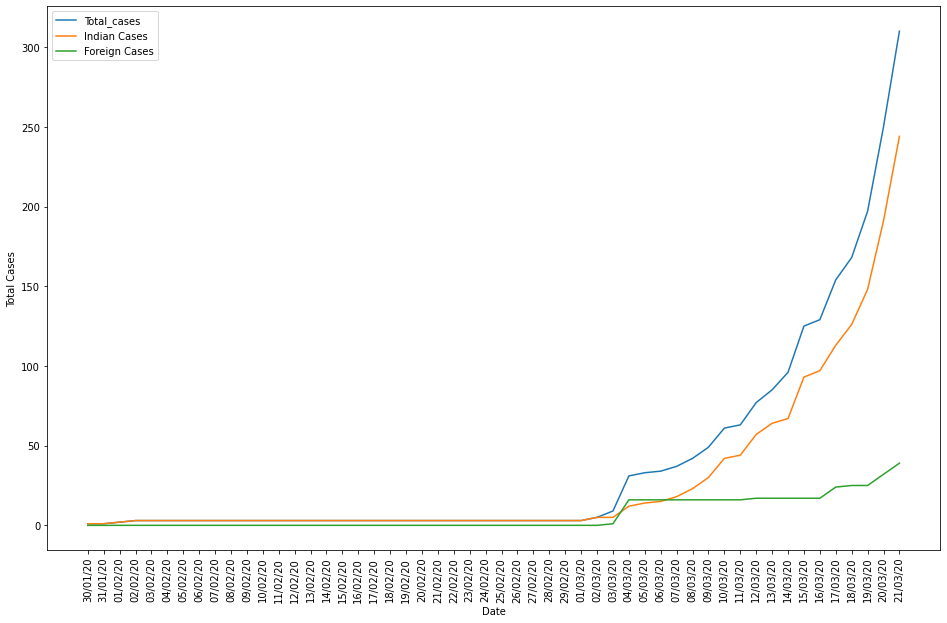

In [11]:
size = (16,10)
fig, ax = plt.subplots(figsize=size)
ax = plt.plot(g1['Date'],g1['Total_cases'], label="Total_cases")
ax = plt.plot(g1['Date'],g1['ConfirmedIndianNational'],label="Indian Cases")
ax = plt.plot(g1['Date'],g1['ConfirmedForeignNational'],label="Foreign Cases")
ax = plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Total Cases')

In [12]:
P_o = 31
t =26

In [16]:
r = 0.0   
start_date = g1.index[g1['Date'] == '04/03/20'][0]
end_date = g1.index[g1['Date'] == '21/03/20'][0]
for i in range(start_date,end_date):
    curr_day_cases = g1.iloc[i]['Total_cases']
    next_day_cases = g1.iloc[i + 1]['Total_cases']
    daily_rate = (next_day_cases - curr_day_cases) / curr_day_cases
    r += daily_rate
r /= (end_date - start_date)

In [17]:
r

0.14814803793984233

In [18]:
P_t = P_o * exp(r * t)

In [19]:
P_t

1459.4810275382426